In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon

In [19]:
spots2 = pd.read_csv("hourly_spots2_location.csv")
spots2

,Unnamed: 0.1,Unnamed: 0,stars,prices,spot_id,adresses,names,location,point,latitude,longitude,altitude
0,0,0,"Excellent (2,342)",CA$9.25,12124,483 Bay St.,Bell Trinity Square Garage - Lot #235,"Bell Trinity Square, 483, Bay Street, Toronto ...","(43.65379335, -79.38242791966158, 0.0)",43.653793,-79.382428,0.0
1,1,1,Excellent (191),CA$8.50,25890,206 Simcoe St.,Lot #2,"206, Simcoe Street, Spadina—Fort York, Old Tor...","(43.652057, -79.3891643, 0.0)",43.652057,-79.389164,0.0
2,2,2,Excellent (78),CA$7,14203,112 Elm St. (525 University Ave.),Garage,"Elm Street, Wick Park Historic District, North...","(41.1111528, -80.6455079, 0.0)",41.111153,-80.645508,0.0
3,5,5,Excellent (18),CA$12,39883,211 Adelaide St. W,Garage,"211, Adelaide Street West, Spadina—Fort York, ...","(43.6483538, -79.3871729, 0.0)",43.648354,-79.387173,0.0
4,10,10,Excellent (130),CA$21,12052,95 Wellington St W,Toronto Dominion Centre Garage - Lot #432,"95 Wellington Street West, 95, Wellington Stre...","(43.64646545, -79.38213608099647, 0.0)",43.646465,-79.382136,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
69,88,88,Excellent (36),CA$6.75,17476,50,80 bpNichol Ln. (152 St. George St.) - Spots #...,"Manche, Normandie, France métropolitaine, France","(49.091895199999996, -1.2454952394090721, 0.0)",49.091895,-1.245495,0.0
70,89,89,Excellent (41),CA$6.25,17513,247 Markham St.,Personal Spot,"247, Markham Street, University—Rosedale, Old ...","(43.65444502142857, -79.40809871428571, 0.0)",43.654445,-79.408099,0.0
71,90,90,Excellent (36),CA$6,12085,333 Lake Shore Blvd. E,Lot,"333, Lake Shore Boulevard East, Spadina—Fort Y...","(43.647918, -79.36017, 0.0)",43.647918,-79.360170,0.0
72,91,91,Excellent (19),CA$7.25,17346,409 Huron St.,Lot #1 - #15,"409, Huron Street, University—Rosedale, Old To...","(43.6665858, -79.4010257, 0.0)",43.666586,-79.401026,0.0


### CREATE GEOMETRY

In [6]:
geometry = [Point(xy) for xy in zip(spots2.longitude, spots2.latitude)]
spots_gdf = gpd.GeoDataFrame(spots2, crs="EPSG:4326", geometry=geometry)

<AxesSubplot:>

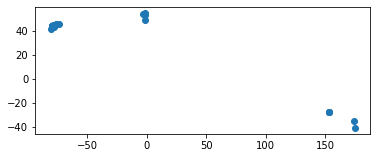

In [7]:
spots_gdf.plot()

### UPLOAD NEIGHBOURHOOD SHAPEFILE

<AxesSubplot:>

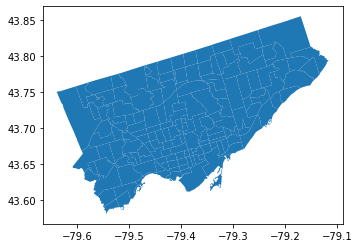

In [8]:
nb_map = gpd.read_file('Neighbourhoods.shp')
nb_map.plot()

In [9]:
nb_map = nb_map.set_crs(4326, allow_override=True)

In [10]:
import folium
m = folium.Map(location=[43.666550, -79.385261], zoom_start=12, tiles='CartoDB positron')
m

In [11]:
for _, r in nb_map.iterrows():
    # Without simplifying the representation of each borough,
    # the map might not be displayed
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': 'orange'})
    folium.Popup(r['FIELD_7']).add_to(geo_j)
    geo_j.add_to(m)
m

### NEIGHBOURHOODS AND PARKING SPOTS MAP DISPLAY

In [12]:
for _, r in spots_gdf.iterrows():
    # Without simplifying the representation of each borough,
    # the map might not be displayed
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': 'orange'})
    folium.Popup(r['names']).add_to(geo_j)
    geo_j.add_to(m)
m

In [13]:
nb_map = nb_map.set_crs(4326, allow_override=True)

### GEOGRAPHIC INTERSECTION OF 2 DATA

In [14]:
spots_gdf_spatialjoin = spots_gdf.sjoin(nb_map, how="left", predicate="within")


In [15]:
print(spots_gdf_spatialjoin)

    Unnamed: 0.1  Unnamed: 0              stars   prices  spot_id  \
0              0           0  Excellent (2,342)  CA$9.25    12124   
1              1           1    Excellent (191)  CA$8.50    25890   
2              2           2     Excellent (78)     CA$7    14203   
3              5           5     Excellent (18)    CA$12    39883   
4             10          10    Excellent (130)    CA$21    12052   
..           ...         ...                ...      ...      ...   
69            88          88     Excellent (36)  CA$6.75    17476   
70            89          89     Excellent (41)  CA$6.25    17513   
71            90          90     Excellent (36)     CA$6    12085   
72            91          91     Excellent (19)  CA$7.25    17346   
73            92          92     Excellent (20)     CA$7    25857   

                              adresses  \
0                         483 Bay St.    
1                      206 Simcoe St.    
2   112 Elm St. (525 University Ave.)    
3  

In [16]:
spots_gdf_sj = spots_gdf_spatialjoin.drop(['FIELD_1', 'FIELD_9', 'FIELD_10', 'FIELD_11', 'FIELD_8', 'FIELD_6', 'FIELD_5', 'FIELD_4', 'FIELD_3', 'FIELD_2'], axis=1)

In [23]:
spots_gdf_sj.to_csv('spots_with_neigboorhods_sj.csv')

In [17]:
m2 = folium.Map(location=[43.666550, -79.385261], zoom_start=13, tiles='CartoDB positron')
m2

### NAMES OF PARKING SPOTS MAP DISPLAY

In [18]:
for _, r in spots_gdf.iterrows():
    # Without simplifying the representation of each borough,
    # the map might not be displayed
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j)
    folium.Popup(r['names']).add_to(geo_j)
    geo_j.add_to(m2)
m2